# Exploratory Data Analysis for Income Classification Dataset

## Notes
- Author: John Enright
- Date: 11/19/2022

## Data
- Training data ``../census_income_learn.csv``
- Test data ``../census_income_test.csv``

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data

train_data = pd.read_csv('../data/census_income_learn.csv', header=None)
test_data = pd.read_csv('../data/census_income_test.csv', header=None)

In [4]:
# Adding column names to the tables
# Retrieved from the ../data/census_income_metadata.txt file

column_names={
    0 : 'age',
    1 : 'class_of_work',
    2 : 'industry_code',
    3 : 'occupation_code',
    4 : 'education',
    5 : 'wage_per_hour',
    6 : 'enrolled_in_edu_inst_last_wk',
    7 : 'marital_status',
    8 : 'major_industry_code',
    9: 'major_occupation_code',
    10: 'race',
    11: 'hispanic_origin',
    12: 'sex',
    13: 'member_of_labor_union',
    14: 'reason_for_unemployment',
    15: 'full_or_part_time_employment_stat',
    16: 'capital_gains',
    17: 'capital_losses',
    18: 'dividends_from_stocks',
    19: 'tax_filer_status',
    20: 'region of previous residence',
    21: 'state_of_previous_residence',
    22: 'detailed_household_and_family_stat',
    23: 'detailed_household_summary_in_household',
    24: 'instance_weight',
    25: 'migration_code_change_in_msa',
    26: 'migration_code_change_in_reg',
    27: 'migration_code_move_within_reg',
    28: 'live_in_this_house_1_year_ago',
    29: 'migration_prev_res_in_sunbelt',
    30: 'num_persons_worked_for_employer',
    31: 'family_member_under_18',
    32: 'country_of_birth_father',
    33: 'country_of_birth_mother',
    34: 'country_of_birth_self',
    35: 'citizenship',
    36: 'own_business_or_self_employed',
    37: 'fill_inc_questionnaire_for_veterans_admin',
    38: 'veteran_benefits',
    39: 'weeks_worked_in_year',
    40: 'year',
    41: 'y'    
    }

df = train_data.rename(columns=column_names)
df_test = test_data.rename(columns=column_names)

In [5]:
df.shape[0]

199523

## Data cleaning and formatting based on data type

In [6]:

# Categorize features based on data type (continous, categorical)
def label_columns(df, columns, label_encoding =False):
    temp_df = df.copy()
    for column in columns:
        # Defines these as categorical features
        temp_df[column] = temp_df[column].astype('category')
        
        if label_encoding == True:
            temp_df[column] = temp_df[column].cat.codes
            
    return temp_df

             

In [7]:
continuous_columns = ['age','wage_per_hour','capital_gains','capital_losses',
                      'dividends_from_stocks','num_persons_worked_for_employer',
                      'instance_weight','weeks_worked_in_year']

categorical_columns = list(set(df.columns) - set(continuous_columns))
df_cat = label_columns(df,categorical_columns)         


In [133]:
df_cat['education']

0                High school graduate
1          Some college but no degree
2                          10th grade
3                            Children
4                            Children
                     ...             
199518              7th and 8th grade
199519                     11th grade
199520     Some college but no degree
199521                     10th grade
199522           High school graduate
Name: education, Length: 199523, dtype: category
Categories (17, object): [' 10th grade', ' 11th grade', ' 12th grade no diploma', ' 1st 2nd 3rd or 4th grade', ..., ' Less than 1st grade', ' Masters degree(MA MS MEng MEd MSW MBA)', ' Prof school degree (MD DDS DVM LLB JD)', ' Some college but no degree']

In [138]:
df_cat['education'].cat.categories

Index([' 10th grade', ' 11th grade', ' 12th grade no diploma',
       ' 1st 2nd 3rd or 4th grade', ' 5th or 6th grade', ' 7th and 8th grade',
       ' 9th grade', ' Associates degree-academic program',
       ' Associates degree-occup /vocational', ' Bachelors degree(BA AB BS)',
       ' Children', ' Doctorate degree(PhD EdD)', ' High school graduate',
       ' Less than 1st grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' Prof school degree (MD DDS DVM LLB JD)',
       ' Some college but no degree'],
      dtype='object')

In [8]:
X_train = label_columns(df, categorical_columns, label_encoding=True)
X_test = label_columns(df_test, categorical_columns, label_encoding=True)

In [9]:
X_train.shape[0]
X_train.columns

Index(['age', 'class_of_work', 'industry_code', 'occupation_code', 'education',
       'wage_per_hour', 'enrolled_in_edu_inst_last_wk', 'marital_status',
       'major_industry_code', 'major_occupation_code', 'race',
       'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_or_part_time_employment_stat',
       'capital_gains', 'capital_losses', 'dividends_from_stocks',
       'tax_filer_status', 'region of previous residence',
       'state_of_previous_residence', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'instance_weight',
       'migration_code_change_in_msa', 'migration_code_change_in_reg',
       'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_member_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
       'own_business_or_self_

In [10]:
# X_train = X_train.duplicated(keep='first')
X_train = X_train.drop_duplicates(inplace=False)
X_train = X_train.drop(['instance_weight'], axis=1)
X_train.shape[0]


196294

In [11]:
y_train = X_train.pop('y')
y_test = X_test.pop('y')
train_counts=y_train.value_counts()
test_counts= y_test.value_counts()

In [12]:
# There is some records that are ' ?', we need to see how many of these are in each feature

for record in df.columns:
    temp = df[record].value_counts()
    index = list(temp.index)
    print(f"The amount of ? in {record} is : ")
    for i in index:
        c = 0
        if i == ' ?':
            print(temp[' ?'])
            c += 1
            break
    if c == 0:
        print("0")

The amount of ? in age is : 
0
The amount of ? in class_of_work is : 
0
The amount of ? in industry_code is : 
0
The amount of ? in occupation_code is : 
0
The amount of ? in education is : 
0
The amount of ? in wage_per_hour is : 
0
The amount of ? in enrolled_in_edu_inst_last_wk is : 
0
The amount of ? in marital_status is : 
0
The amount of ? in major_industry_code is : 
0
The amount of ? in major_occupation_code is : 
0
The amount of ? in race is : 
0
The amount of ? in hispanic_origin is : 
0
The amount of ? in sex is : 
0
The amount of ? in member_of_labor_union is : 
0
The amount of ? in reason_for_unemployment is : 
0
The amount of ? in full_or_part_time_employment_stat is : 
0
The amount of ? in capital_gains is : 
0
The amount of ? in capital_losses is : 
0
The amount of ? in dividends_from_stocks is : 
0
The amount of ? in tax_filer_status is : 
0
The amount of ? in region of previous residence is : 
0
The amount of ? in state_of_previous_residence is : 
708
The amount of ? 

## Visualizations

- Lets look at a couple features of interest


In [13]:
# Combine data to compare the two when plotted
full_df = [df, df_test]
plot_titles = ['Training Data', 'Test Data']

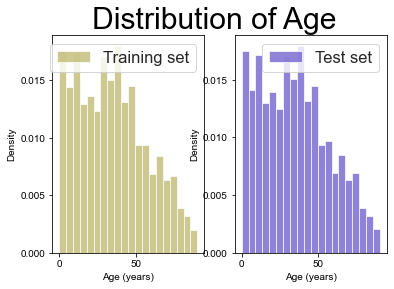

In [14]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font',size = 20)
fig, ax = plt.subplots(1,2)
fig.suptitle('Distribution of Age', fontsize= 30)

sns.set(font_scale=1.5)
#sns.set_style("whitegrid")
sns.set_palette('pastel')
sns.set_style('whitegrid')
# sns.set_palette('pastel')

sns.histplot(df['age'], bins = 20, color ='darkkhaki', ax= ax[0],stat= 'density', label='Training set') 
sns.histplot(df_test['age'], bins = 20, color = 'slateblue', ax= ax[1], stat = 'density', label='Test set')
ax[0].set_xlabel('Age (years)')
ax[1].set_xlabel('Age (years)')
ax[0].legend()
ax[1].legend()

In [15]:
labs = np.arange(len(plot_titles))
width = 0.45
fontsize = 20

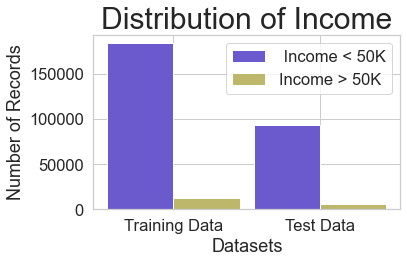

In [16]:
# Distribution of the target variable
sns.set_palette("pastel")

train_counts=y_train.value_counts()
test_counts= y_test.value_counts()

zero= [train_counts[0],test_counts[0]]
ones = [train_counts[1],test_counts[1]]

fig, ax = plt.subplots()
rects1 = ax.bar(labs - width/2, zero, width, label=' Income < 50K', color=['slateblue', 'slateblue'])
rects2 = ax.bar(labs + width/2, ones, width, label='Income > 50K', color=['darkkhaki', 'darkkhaki'])
ax.set_xticks(labs)
ax.set_xticklabels(plot_titles)
ax.set_ylabel('Number of Records')
ax.set_xlabel('Datasets')
ax.set_title('Distribution of Income', fontsize = 30)
ax.legend()
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

[Text(0.5, 1.0, 'Correlation Plot for Income Data')]

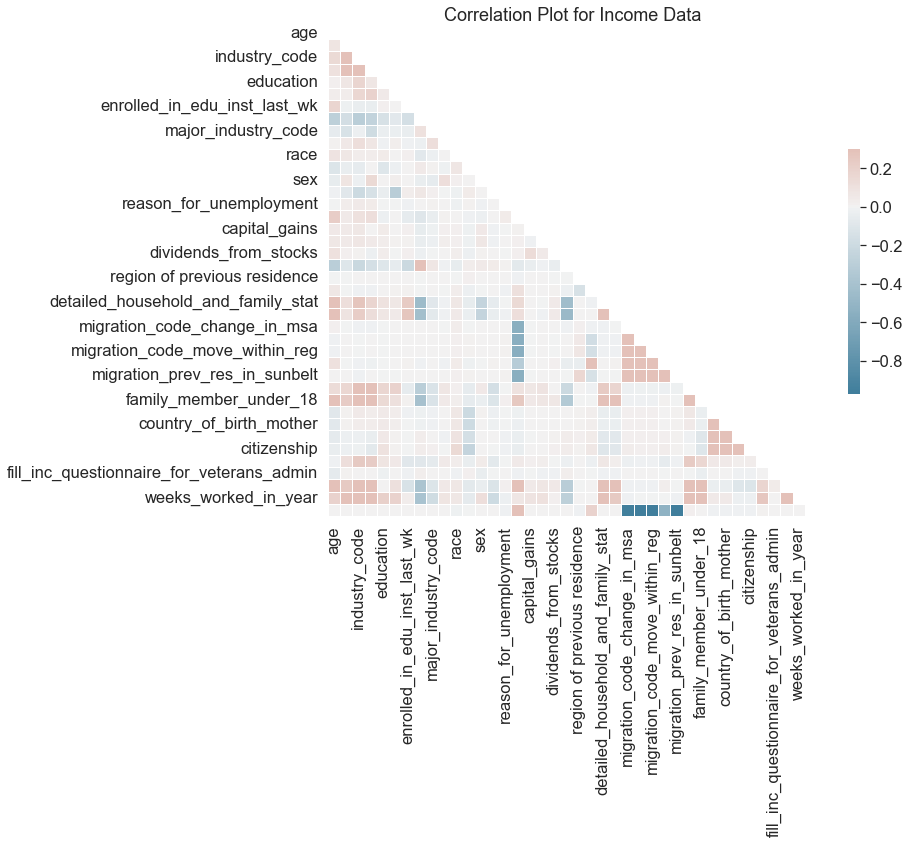

In [17]:
# Corr plot
corrs = X_train.corr()
mask = np.triu(np.ones_like(corrs))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# fig.suptitle('Correlation Plot for Income Data')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrs, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlation Plot for Income Data')

[Text(0, 0, ' Divorced'),
 Text(1, 0, ' Married-A F spouse present'),
 Text(2, 0, ' Married-civilian spouse present'),
 Text(3, 0, ' Married-spouse absent'),
 Text(4, 0, ' Never married'),
 Text(5, 0, ' Separated'),
 Text(6, 0, ' Widowed')]

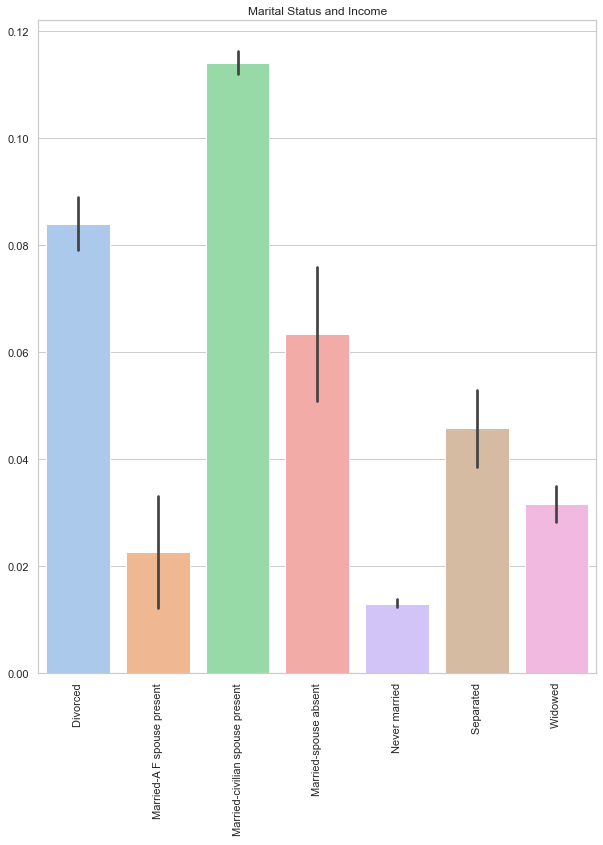

In [142]:
# Work Industry vs Income
X_train = label_columns(df, categorical_columns, label_encoding=True)
X_test = label_columns(df_test, categorical_columns, label_encoding=True)
X_train['y'] = X_train['y'].astype('category').cat.codes

# Mapping a label to each category
industry_map = {
        ' Married-civilian spouse present' : 1,
        ' Married-A F spouse present': 2,
        ' Married-spouse absent': 3,
        ' Widowed': 4,
        ' Divorced': 5,
        ' Separated': 6,
        ' Never married':7,
}

# Plot
sns.set_palette("pastel")
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize = (10,12))
sns_grad = sns.barplot(x = df_cat['marital_status'].cat.codes, y = df_cat['y'].cat.codes, data = df_cat, ax=ax)
sns_grad.set(title='Marital Status and Income')
ax.set_xticklabels(df_cat['marital_status'].cat.categories, rotation=90)

[Text(0, 0, ' 10th grade'),
 Text(1, 0, ' 11th grade'),
 Text(2, 0, ' 12th grade no diploma'),
 Text(3, 0, ' 1st 2nd 3rd or 4th grade'),
 Text(4, 0, ' 5th or 6th grade'),
 Text(5, 0, ' 7th and 8th grade'),
 Text(6, 0, ' 9th grade'),
 Text(7, 0, ' Associates degree-academic program'),
 Text(8, 0, ' Associates degree-occup /vocational'),
 Text(9, 0, ' Bachelors degree(BA AB BS)'),
 Text(10, 0, ' Children'),
 Text(11, 0, ' Doctorate degree(PhD EdD)'),
 Text(12, 0, ' High school graduate'),
 Text(13, 0, ' Less than 1st grade'),
 Text(14, 0, ' Masters degree(MA MS MEng MEd MSW MBA)'),
 Text(15, 0, ' Prof school degree (MD DDS DVM LLB JD)'),
 Text(16, 0, ' Some college but no degree')]

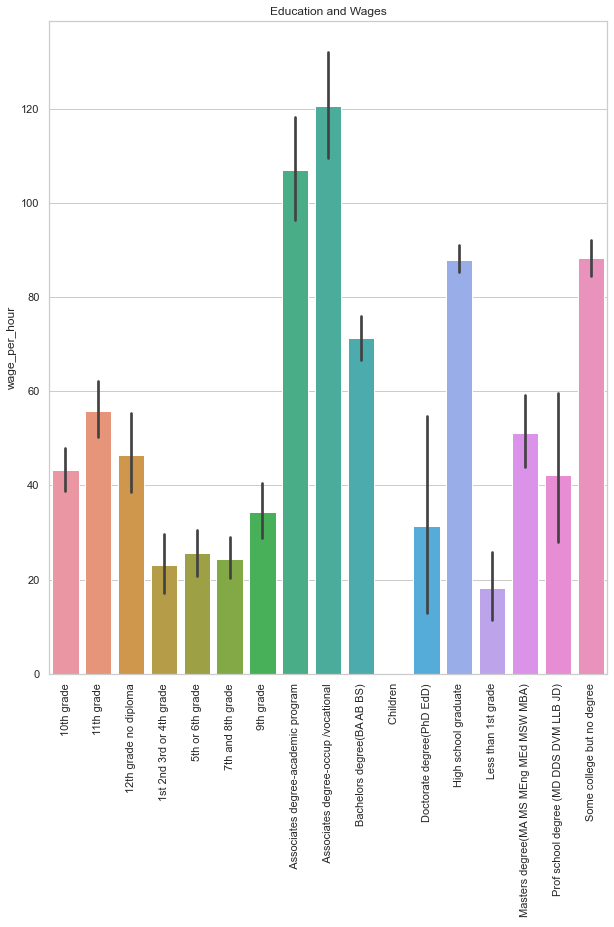

In [140]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (10,12))
sns_grad = sns.barplot(
        x = df_cat['education'].cat.codes, 
        y = df_cat['wage_per_hour'], 
        data = df_cat,
        ax=ax)
sns_grad.set(title='Education and Wages')
sns.set(rc={'figure.figsize':(11.7,8.27)})
educations={
        ' Children': 0,
        ' Less than 1st grade': 1,
        ' 1st 2nd 3rd or 4th grade': 2,
        ' 5th or 6th grade':3,
        ' 7th and 8th grade':4,
        ' 9th grade': 5,
        ' 10th grade': 6,
        ' 11th grade': 7,
        ' 12th grade no diploma': 8,
        ' High school graduate' : 9,
        ' Some college but no degree': 10,
        ' Associates degree-occup /vocational': 11,
        ' Associates degree-academic program': 12,
        ' Bachelors degree(BA AB BS)':13,
        ' Masters degree(MA MS MEng MEd MSW MBA)': 14,
        ' Prof school degree (MD DDS DVM LLB JD)': 15,
        ' Doctorate degree(PhD EdD)': 16,    
        }
ax.set_xticklabels(df_cat['education'].cat.categories, rotation=90)

[Text(0, 0, ' 10th grade'),
 Text(1, 0, ' 11th grade'),
 Text(2, 0, ' 12th grade no diploma'),
 Text(3, 0, ' 1st 2nd 3rd or 4th grade'),
 Text(4, 0, ' 5th or 6th grade'),
 Text(5, 0, ' 7th and 8th grade'),
 Text(6, 0, ' 9th grade'),
 Text(7, 0, ' Associates degree-academic program'),
 Text(8, 0, ' Associates degree-occup /vocational'),
 Text(9, 0, ' Bachelors degree(BA AB BS)'),
 Text(10, 0, ' Children'),
 Text(11, 0, ' Doctorate degree(PhD EdD)'),
 Text(12, 0, ' High school graduate'),
 Text(13, 0, ' Less than 1st grade'),
 Text(14, 0, ' Masters degree(MA MS MEng MEd MSW MBA)'),
 Text(15, 0, ' Prof school degree (MD DDS DVM LLB JD)'),
 Text(16, 0, ' Some college but no degree')]

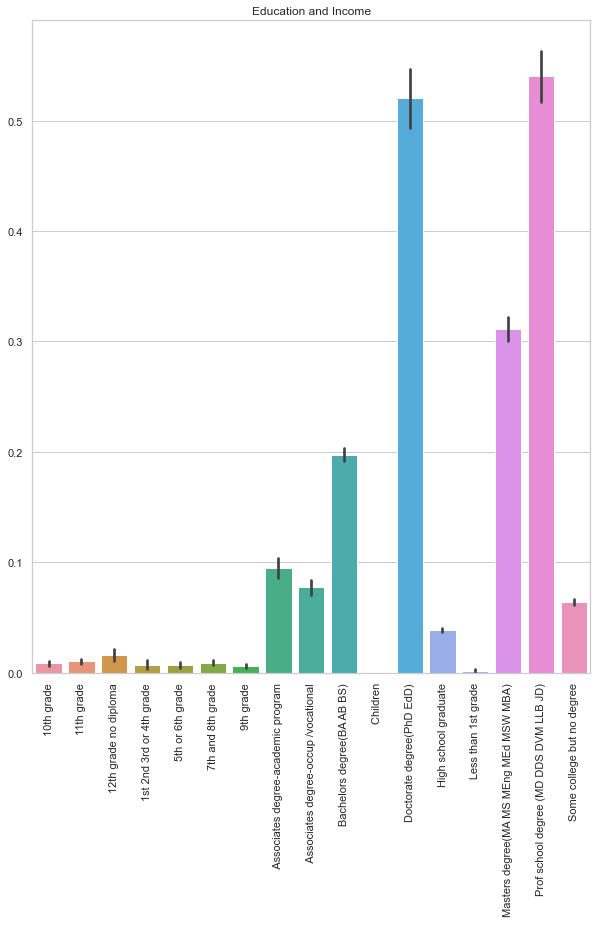

In [139]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (10,12))
sns_grad = sns.barplot(
        x = df_cat['education'].cat.codes, 
        y = df_cat['y'].cat.codes, 
        data = df_cat,
        ax=ax)
sns_grad.set(title='Education and Income')
sns.set(rc={'figure.figsize':(11.7,8.27)})
educations={
        ' Children': 0,
        ' Less than 1st grade': 1,
        ' 1st 2nd 3rd or 4th grade': 2,
        ' 5th or 6th grade':3,
        ' 7th and 8th grade':4,
        ' 9th grade': 5,
        ' 10th grade': 6,
        ' 11th grade': 7,
        ' 12th grade no diploma': 8,
        ' High school graduate' : 9,
        ' Some college but no degree': 10,
        ' Associates degree-occup /vocational': 11,
        ' Associates degree-academic program': 12,
        ' Bachelors degree(BA AB BS)':13,
        ' Masters degree(MA MS MEng MEd MSW MBA)': 14,
        ' Prof school degree (MD DDS DVM LLB JD)': 15,
        ' Doctorate degree(PhD EdD)': 16,    
        }
ax.set_xticklabels(df_cat['education'].cat.categories, rotation=90)
# ax.set_xticklabels(list(educations.keys()), rotation=90)

In [58]:
# data where income is < $50,000
high_income = X_train[X_train['y'] ==1]
low_income = X_train[X_train['y'] ==0]

Text(0.5, 0, 'Sex')

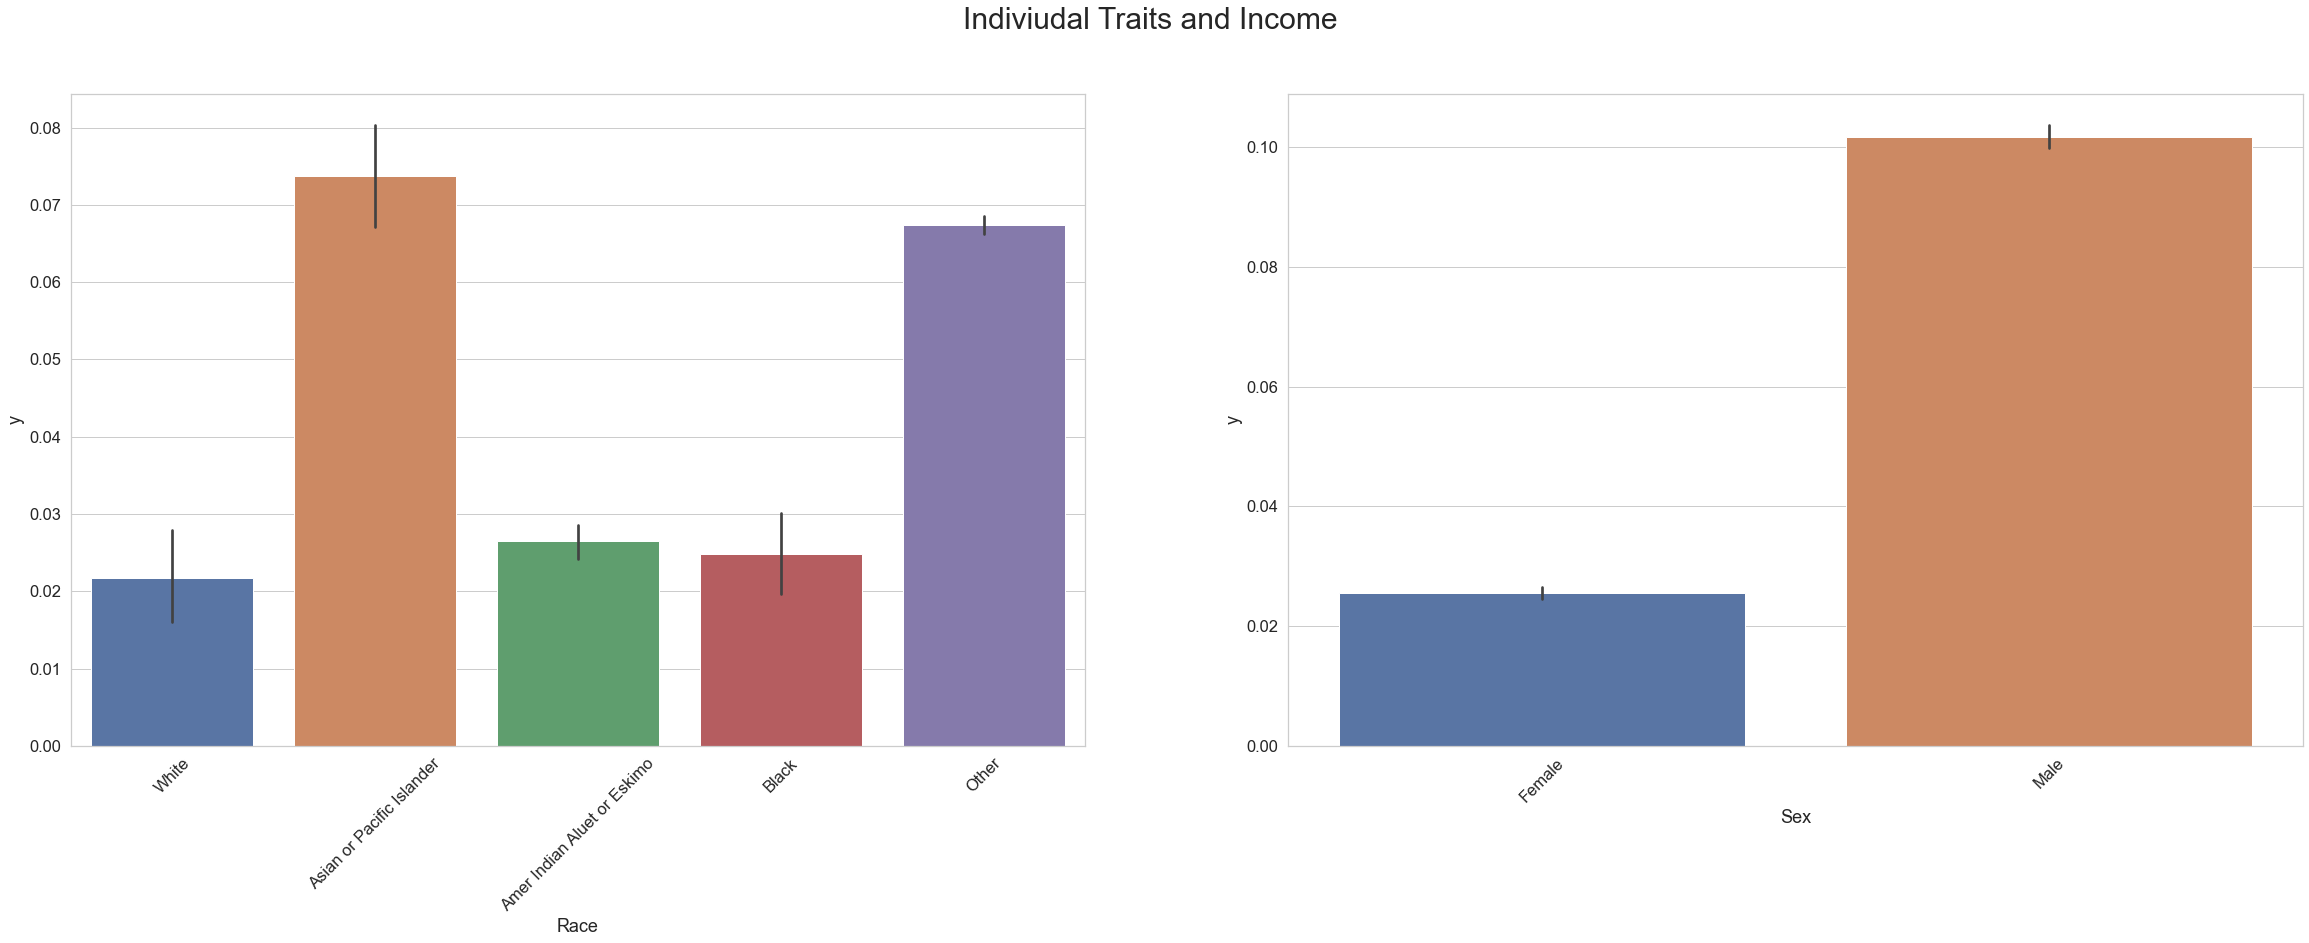

In [126]:
plt.rcParams['figure.figsize'] = [40, 12]
plt.rc('font',size = 12)
fig, ax = plt.subplots(1,2)
fig.suptitle('Indiviudal Traits and Income', fontsize= 30)
# fig, ax = plt.subplots(figsize = (10,12))

sns.set(font_scale=1.5)
sns.set_style('whitegrid',{'axes.grid':True})

sns.barplot(x=X_train['race'], y=X_train['y'] , data=X_train,ax= ax[0]) 
sns.barplot(x=X_train['sex'], y=X_train['y'],data=X_train,ax= ax[1])

race = ['White','Asian or Pacific Islander', 'Amer Indian Aluet or Eskimo', 'Black', 'Other']
sex = ['Female', 'Male']
ax[0].set_xticklabels(race,rotation=45)
ax[1].set_xticklabels(sex,rotation=45)


# sns.histplot(low_income['age'], bins = 30, color = 'slateblue', ax= ax[1],stat= 'percent', label='Less than $50K') 
# # sns.histplot(high_income['age'], bins = 30, color = 'darkkhaki', ax= ax[1], stat = 'percent', label='More than $50K')
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Sex')
# ax[0].legend()

In [127]:
high_income['sex'].value_counts()


0    101321
1     85820
Name: sex, dtype: int64

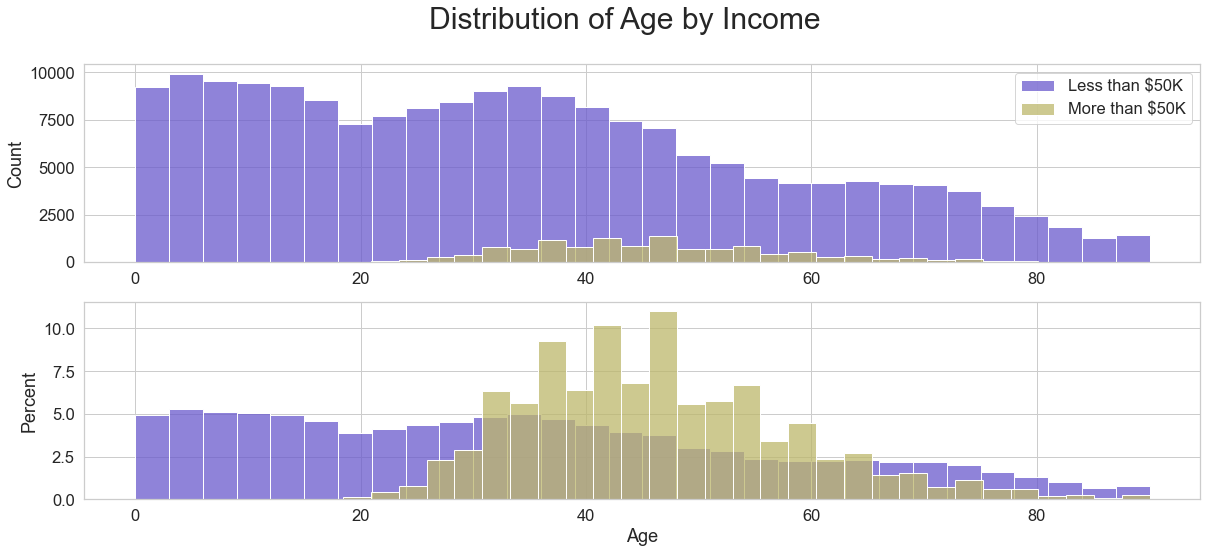

In [98]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font',size = 20)
fig, ax = plt.subplots(2,1)
fig.suptitle('Distribution of Age by Income', fontsize= 30)
# fig, ax = plt.subplots(figsize = (10,12))

sns.set(font_scale=1.5)
sns.set_style('whitegrid',{'axes.grid':True})

sns.histplot(low_income['age'], bins = 30, color = 'slateblue', ax= ax[0],stat= 'count', label='Less than $50K') 
sns.histplot(high_income['age'], bins = 30, color = 'darkkhaki', ax= ax[0], stat = 'count', label='More than $50K')
sns.histplot(low_income['age'], bins = 30, color = 'slateblue', ax= ax[1],stat= 'percent', label='Less than $50K') 
sns.histplot(high_income['age'], bins = 30, color = 'darkkhaki', ax= ax[1], stat = 'percent', label='More than $50K')
ax[0].set_xlabel('')
ax[1].set_xlabel('Age')
ax[0].legend()